**Name: Yutika Rege**	   					                                                                       

**Date: 08-07-2021** 

**PRN: 1901202012**

**School: Data Science**

**Program: B.Sc. Data Science**

**Year/ Semester: 2nd / 4th**

**Subject Name: Machine Learning 2**

**Subject Code: DS401**

**Title: Classification Model Selection.**

**Skills/Competencies to be acquired:**

1.	Application of binomial classification algorithms.

2.	Selection of the best model.

3.	Exploratory data analysis and feature 

**Duration of activity: 1 Hour**


**1.	What is the purpose of this activity?**

The purpose of this activity is to select the classification model that would give the most accurate predictions.

**2.	Steps performed in this activity.**

1.	Import the required modules and read the data.

2.	Perform statistical as well as visual EDA over the data.

3.	Find correlations using a heatmap.

4.	Split the data in independent and dependent features.

5.	Split the data into an 80 : 20  ::  train : test ratio.

6.	Train the data using different model.

7.	Note the accuracies and compare the modeles.

**3.	What resources / materials / equipment / tools did you use for this activity?**

•	Jupyter Notebook 

•	Lecture notes 

•	Google, Google Meet

•	MS Word, MS Excel 

•	Websites: W3Resources, Towards Data Science 

**4.	What skills did you acquire?**

•	Able to apply various binomial classification algorithms to predict a binary outcome.

•	Able to select the most apt model.

•	Able to perform EDA and derive actionable insights.

**5.	Time taken to complete the activity?**

1 Hour.


**Importing modules:**

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')

**Reading the dataset:**

In [26]:
diab = pd.read_csv("C://Users//Yutika//Downloads//diabetes.csv")
diab.head(4).transpose()

,0,1,2,3
Pregnancies,6.000,1.000,8.000,1.000
Glucose,148.000,85.000,183.000,89.000
BloodPressure,72.000,66.000,64.000,66.000
SkinThickness,35.000,29.000,0.000,23.000
Insulin,0.000,0.000,0.000,94.000
BMI,33.600,26.600,23.300,28.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167
Age,50.000,31.000,32.000,21.000
Outcome,1.000,0.000,1.000,0.000


**Comment:** 1 corresponds to **_Diabetic_** and 0 to **_Non-diabetic_**

**Exploratory Data Analysis:**

**1) Checking for missing values:**

In [31]:
print(f"There are {diab.isna().sum().sum()} missing values")

There are 0 missing values


**2) Column names:**

In [5]:
diab.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**3) Checking for shape of the dataset:**

In [6]:
print(f"Shape:\n\nRows   : {diab.shape[0]}\nColumns: {diab.shape[1]}")

Shape:

Rows   : 768
Columns: 9


**4) Checking the data types:**

In [7]:
diab.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**Comment:** There are 768 rows and 9 columns with no missing values in the dataset. All the features are of numeric data type.

**5) Descriptive statistics:**

In [34]:
diab.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Visual EDA:**

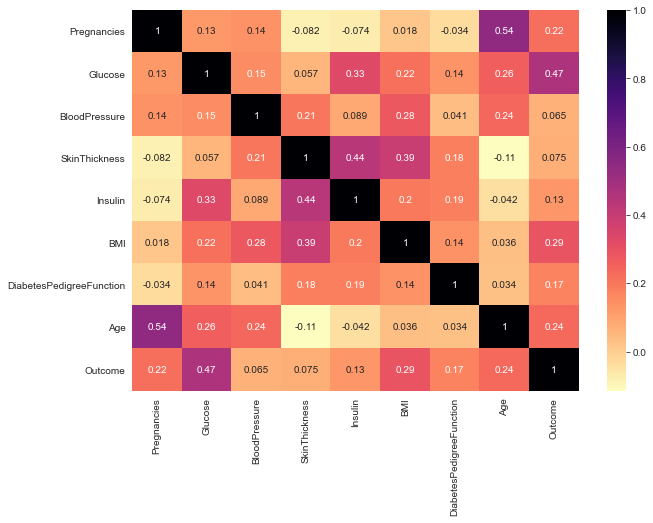

In [10]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.set_style("dark")
sns.heatmap(diab.corr(),cmap="magma_r",annot=True)

Text(0.5, 1.0, 'How many people have Diabetes ?')

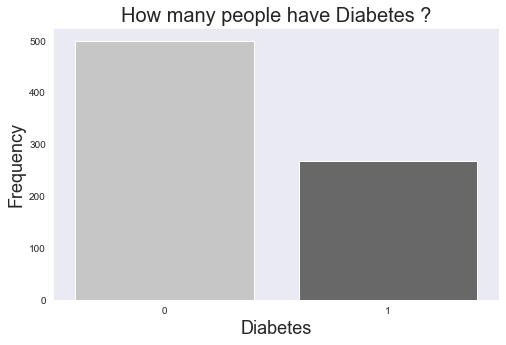

In [79]:
plt.figure(figsize=(8,5))
sns.countplot(data=diab,x="Outcome",palette="Greys")
plt.xlabel("Diabetes",size=18)
plt.ylabel("Frequency",size=18)
plt.title("How many people have Diabetes ?",size=20)

In [13]:
print("Percentage:\n")
diab_no = len(diab[diab["Outcome"]==0])/len(diab["Outcome"])
print("No:",round(diab_no*100,2), "%")

diab_yes = len(diab[diab["Outcome"]==1])/len(diab["Outcome"])
print("Yes:",round(diab_yes*100,2), "%")

Percentage:

No: 65.1 %
Yes: 34.9 %


**Comment:** Only ~35% people i.e. 268 people have diabetes.

Text(0, 0.5, 'Features')

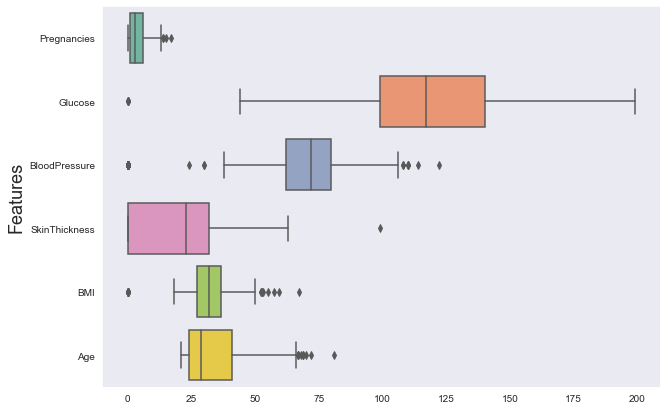

In [36]:
plt.figure(figsize=(10,7))
box_inputs = diab.iloc[:,:-1]
box_inputs = box_inputs.drop(['Insulin','DiabetesPedigreeFunction'],axis=1) 
sns.boxplot(data=box_inputs,orient='h',palette='Set2')
plt.ylabel("Features",size=18)

Text(0.5, 0, 'DP Function')

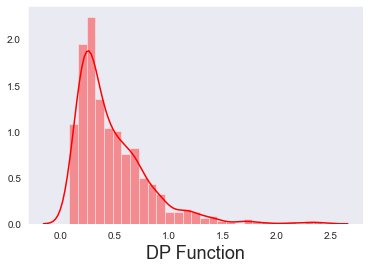

In [43]:
sns.distplot(diab['DiabetesPedigreeFunction'],color='red')
plt.xlabel("DP Function",size=18)

Text(0.5, 0, 'Insulin')

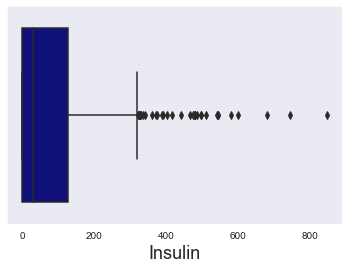

In [47]:
sns.boxplot(diab['Insulin'],color='darkblue')
plt.xlabel("Insulin",size=18)

In [57]:
ins_diab_corr=np.corrcoef(diab["Insulin"],diab["Outcome"])
round(ins_diab_corr[0,1],2)

0.13

Text(0.5, 1.0, 'Glucose vs. Diabetes')

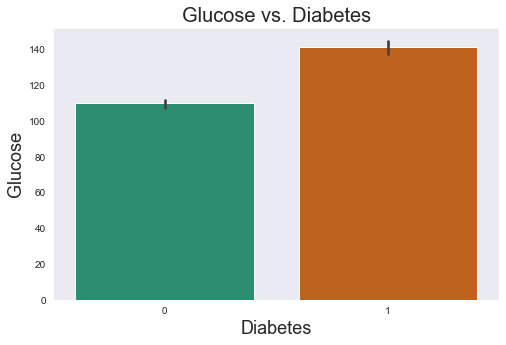

In [67]:
plt.figure(figsize=(8,5))
sns.barplot(data=diab,x="Outcome",y="Glucose",palette="Dark2")
plt.xlabel("Diabetes",size=18)
plt.ylabel("Glucose",size=18)
plt.title("Glucose vs. Diabetes",size=20)

In [68]:
gluc_diab_corr=np.corrcoef(diab["Glucose"],diab["Outcome"])
round(gluc_diab_corr[0,1],2)

0.47

In [76]:
diab_corr = diab[["Insulin","Glucose","Outcome"]]
diab_corr_1=diab_corr[diab_corr["Outcome"]==1]
diab_corr_0=diab_corr[diab_corr["Outcome"]==0]

print("INSULIN:\nMedian insulin for diabetic persons    : ",diab_corr_1["Insulin"].median())
print("Median insulin for non-diabetic persons:",diab_corr_0["Insulin"].median(),"\n")

print("GLUCOSE:\nMedian glucose for diabetic persons    :",diab_corr_1["Glucose"].median())
print("Median glucose for non-diabetic persons:",diab_corr_0["Glucose"].median())

INSULIN:
Median insulin for diabetic persons    :  0.0
Median insulin for non-diabetic persons: 39.0 

GLUCOSE:
Median glucose for diabetic persons    : 140.0
Median glucose for non-diabetic persons: 107.0


**Comment:** Generally speaking, it is an established fact that individuals with diabetes have low insulin levels and higher glucose levels when compared to non-diabetic persons which confirms the varying magnitudes of our results.

**Splitting the data into X and y:**

In [121]:
X = diab.iloc[:,:-1]
y = diab.iloc[:,-1]

**Training the data:**

In [137]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

**Model-1: Logistic Regression**

In [138]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [139]:
X_test.shape

(154, 8)

In [140]:
y_pred_log = logreg.predict(X_test)

In [141]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [142]:
cm_log=pd.DataFrame(confusion_matrix(y_test,y_pred_log),columns=["0","1"],index=["0","1"])
cm_log

,0,1
0,86,5
1,29,34


In [143]:
accuracy_score(y_test,y_pred_log)

0.7792207792207793

**The variable "Outcome" has imbalanced data; meaning there are 65% non-diabetic persons and 35% diabetic persons. Often times, while sampling the data we use different CV methods for instance, Leave One Out Cross Validation (LOOCV) or k-Fold CV. The disadvantage of LOOCV is that its an iterative procedure, which is time-consuming and cost intensive. To overcome this disadvantage we could use a batch sampling method of k-Fold CV but the issue with it is that when it is sampling in batches, it has a tendency to sample th data as it is and in one sample, there may be imbalanced data.** 

**Again, to solve this issue, we could use something called "Stratified k-Fold CV" which is an improvment upon k-Fold CV and randomises batches such that there are almost same number of 0s and 1s if not less so as to avoid training of data on imbalanced data; case in point - The outcome of our dataset. The main purpose of cross validation is to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.**

In [168]:
skfold = StratifiedKFold(n_splits=10)
cv_score = cross_val_score(logreg,X,y,cv=skfold)

**Model-2: Naive Bayes classifier**

In [170]:
naiveBayes = GaussianNB()
naiveBayes.fit(X_train,y_train)

GaussianNB()

In [171]:
y_pred_nb = naiveBayes.predict(X_test)

In [172]:
cm_nb=pd.DataFrame(confusion_matrix(y_test,y_pred_nb),columns=["0","1"],index=["0","1"])
cm_nb

,0,1
0,83,8
1,25,38


In [173]:
accuracy_score(y_test,y_pred_nb)

0.7857142857142857

In [174]:
cv_score_nb = cross_val_score(naiveBayes,X,y,cv=skfold)

**Model-3: Random Forest classifer**

In [175]:
randomForest = RandomForestClassifier()
randomForest.fit(X_train,y_train)

RandomForestClassifier()

In [176]:
y_pred_rf = randomForest.predict(X_test)

In [177]:
cm_rf=pd.DataFrame(confusion_matrix(y_test,y_pred_rf),columns=["0","1"],index=["0","1"])
cm_rf

,0,1
0,81,10
1,28,35


In [178]:
accuracy_score(y_test,y_pred_rf)

0.7532467532467533

In [179]:
cv_score_rf = cross_val_score(randomForest,X,y,cv=skfold)

**Comparing accuracies:**

In [186]:
print("Maximum accuracies for all classifiers:\n")
print(f"Logistic regression:{(cv_score).max()}\nNaive Bayes:{(cv_score_nb).max()}\nRandom Forest:{(cv_score_rf).max()}")

Maximum accuracies for all classifiers:

Logistic regression:0.8289473684210527
Naive Bayes      :0.8051948051948052
Random Forest:0.8571428571428571


In [187]:
print("Minimum accuracies for all classifiers:\n")
print(f"Logistic regression:{(cv_score).min()}\nNaive Bayes:{(cv_score_nb).min()}\nRandom Forest:{(cv_score_rf).min()}")

Minimum accuracies for all classifiers:

Logistic regression:0.7142857142857143
Naive Bayes:0.7142857142857143
Random Forest:0.6493506493506493


In [188]:
print("Mean accuracies for all classifiers:\n")
print(f"Logistic regression:{(cv_score).mean()}\nNaive Bayes:{(cv_score_nb).mean()}\nRandom Forest:{(cv_score_rf).mean()}")

Mean accuracies for all classifiers:

Logistic regression:0.7734791524265209
Naive Bayes:0.7564935064935066
Random Forest:0.7604237867395763


**Comment:**

The best performing model of all of the above mentioned is Logistic regression and the lowest performing model is Random forest classifier. The accuracies of all models are low owing to the fact that this dataset in indeed imbalanced which would mean that it is biased and the training data does not generalise very well on the test data.